In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.makedirs("./Visuals", exist_ok=True)

pd.set_option("display.float_format", "{:.2f}".format)
customers = pd.read_csv("../data/customers.csv")
orders = pd.read_csv("../data/orders.csv")
order_items = pd.read_csv("../data/order_items.csv")
events = pd.read_csv("../data/events.csv")
products = pd.read_csv("../data/products.csv")
reviews = pd.read_csv("../data/reviews.csv")
sessions = pd.read_csv("../data/sessions.csv")


In [23]:
total_revenue = orders["total_usd"].sum()
total_orders = orders["order_id"].nunique()
aov = total_revenue / total_orders

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Average Order Value:", aov)

Total Revenue: 11950.679999999998
Total Orders: 99
Average Order Value: 120.71393939393938


In [6]:
order_detail = order_items.merge(products, on="product_id", how="left")

order_detail["profit"] = (
    order_detail["quantity"] *
    (order_detail["unit_price_usd"] - order_detail["cost_usd"])
)

total_profit = order_detail["profit"].sum()

print("Total Profit:", total_profit)
print("Profit Margin:", total_profit / total_revenue)

Total Profit: 114.77999999999999
Profit Margin: 0.00960447438974184


In [7]:
order_counts = orders.groupby("customer_id")["order_id"].count()

repeat_rate = (order_counts > 1).mean()

print("Repeat Purchase Rate:", repeat_rate)

Repeat Purchase Rate: 0.0


In [8]:
funnel = events["event_type"].value_counts()

funnel = funnel.loc[
    ["page_view","add_to_cart","checkout","purchase"]
]

print(funnel)

event_type
page_view      69
add_to_cart    19
checkout        6
purchase        5
Name: count, dtype: int64


In [9]:
conversion_rate = funnel["purchase"] / funnel["page_view"]
cart_abandonment = 1 - (funnel["purchase"] / funnel["add_to_cart"])

print("Overall Conversion Rate:", conversion_rate)
print("Cart Abandonment Rate:", cart_abandonment)

Overall Conversion Rate: 0.07246376811594203
Cart Abandonment Rate: 0.736842105263158


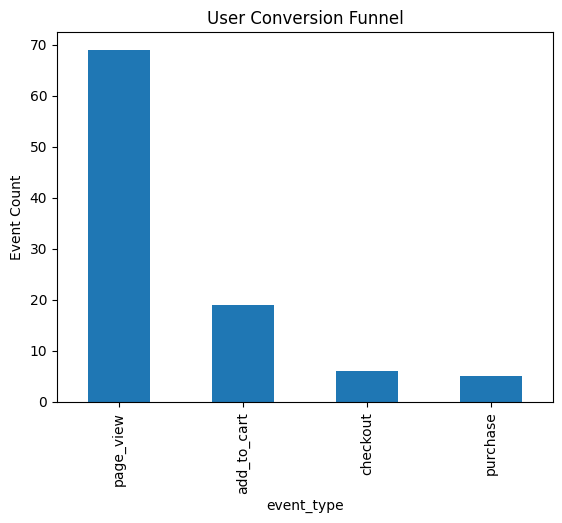

In [19]:
funnel.plot(kind="bar")
plt.title("User Conversion Funnel")
plt.ylabel("Event Count")
plt.savefig("./Visuals/funnel_chart.png", bbox_inches="tight", dpi=300)
plt.show()

In [25]:
channel_metrics = orders.groupby("source").agg(
    revenue=("total_usd","sum"),
    orders=("order_id","count"),
    avg_order_value=("total_usd","mean")
)

print(channel_metrics)

          revenue  orders  avg_order_value
source                                    
direct    3829.70      22           174.08
email     1033.81       8           129.23
organic   2994.16      33            90.73
paid      2024.12      16           126.51
referral   948.74      10            94.87
social    1120.15      10           112.01


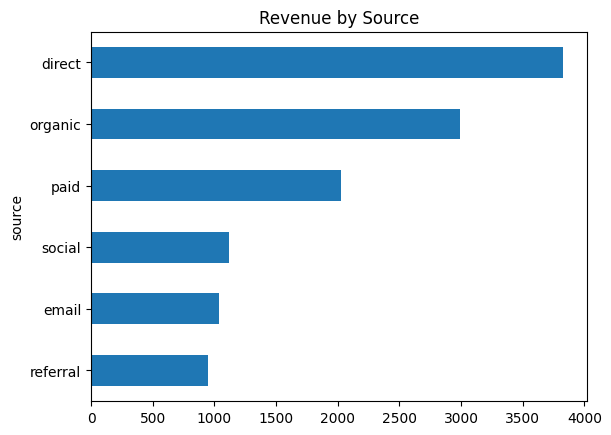

In [26]:
channel_metrics["revenue"].sort_values().plot(kind="barh")
plt.title("Revenue by Source")
plt.savefig("./Visuals/02_revenue_by_source.png", bbox_inches="tight", dpi=300)
plt.show()

In [28]:
device_metrics = orders.groupby("device").agg(
    revenue=("total_usd","sum"),
    aov=("total_usd","mean"),
    orders=("order_id","count")
)

print(device_metrics)

         revenue    aov  orders
device                         
desktop  2545.55  84.85      30
mobile   8087.68 144.42      56
tablet   1317.45 101.34      13


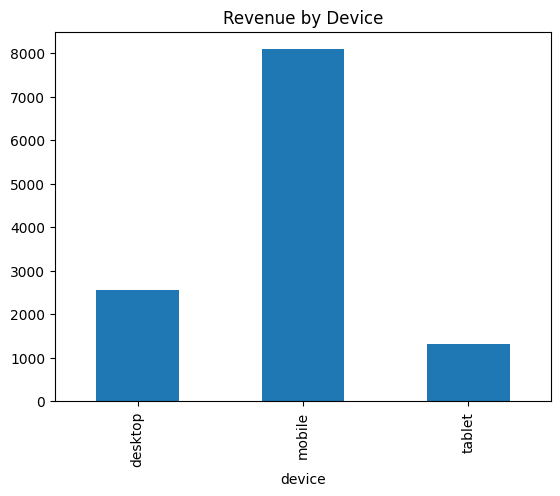

In [29]:
device_metrics["revenue"].plot(kind="bar")
plt.title("Revenue by Device")
plt.savefig("./Visuals/03_revenue_by_device.png", bbox_inches="tight", dpi=300)
plt.show()

In [30]:
customer_ltv = orders.groupby("customer_id")["total_usd"].sum()

customer_ltv = customer_ltv.sort_values(ascending=False)
print(customer_ltv.head(10))

customer_id
9683    576.30
16448   573.09
8099    567.53
554     508.23
5925    435.01
1865    419.24
11675   371.39
8567    317.80
9132    314.36
2068    304.92
Name: total_usd, dtype: float64


In [31]:
top_20 = int(len(customer_ltv) * 0.2)

top_revenue_share = (
    customer_ltv.head(top_20).sum() /
    customer_ltv.sum()
)

print("Revenue from Top 20% Customers:", top_revenue_share)

Revenue from Top 20% Customers: 0.5547717786770292


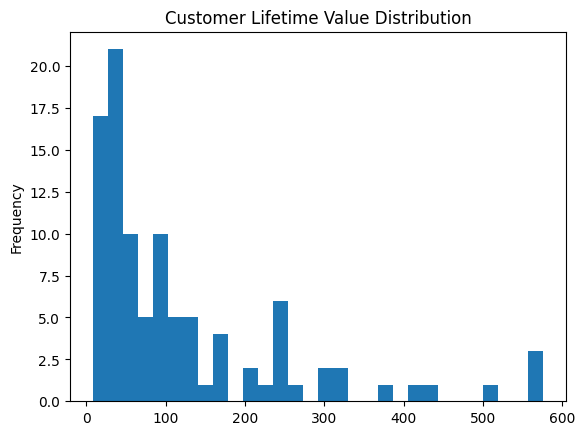

In [32]:
customer_ltv.plot(kind="hist", bins=30)
plt.title("Customer Lifetime Value Distribution")
plt.savefig("./Visuals/05_ltv_distribution.png", bbox_inches="tight", dpi=300)
plt.show()

In [33]:
product_profit = order_detail.groupby("product_id")["profit"].sum()

product_profit = product_profit.sort_values(ascending=False)
print(product_profit.head(10))

product_id
77    71.56
27    27.73
24    15.49
123    0.00
156    0.00
170    0.00
172    0.00
177    0.00
198    0.00
217    0.00
Name: profit, dtype: float64


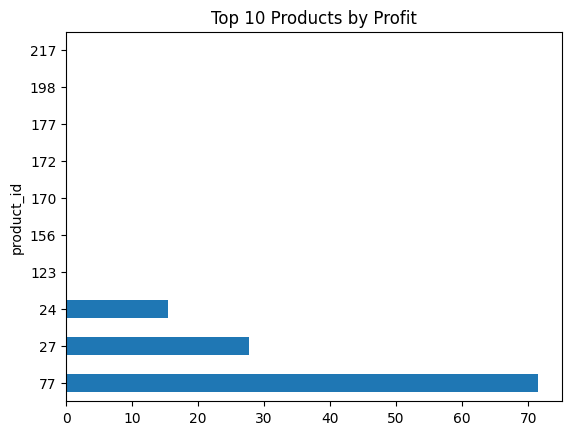

In [34]:
top_products = product_profit.head(10)

top_products.plot(kind="barh")
plt.title("Top 10 Products by Profit")
plt.savefig("./Visuals/06_repeat_purchase_rate.png", bbox_inches="tight", dpi=300)
plt.show()

In [35]:
avg_rating = reviews.groupby("product_id")["rating"].mean()

product_profit = order_detail.groupby("product_id")["profit"].sum()

rating_profit = pd.concat([avg_rating, product_profit], axis=1).dropna()

rating_profit.columns = ["rating","profit"]
print(rating_profit.corr())

        rating  profit
rating    1.00     NaN
profit     NaN     NaN


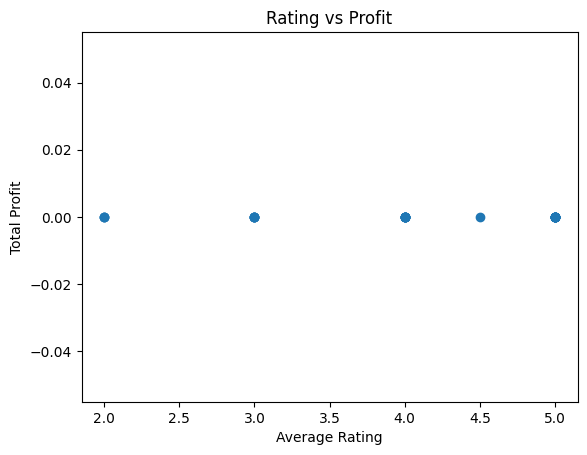

In [36]:
plt.scatter(rating_profit["rating"], rating_profit["profit"])
plt.xlabel("Average Rating")
plt.ylabel("Total Profit")
plt.title("Rating vs Profit")
plt.savefig("./Visuals/07_rating_vs_profit_scatter.png", bbox_inches="tight", dpi=300)
plt.show()